In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:

summary_stats = df.describe()
print(summary_stats)


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [ ]:
from scipy.stats import zscore
z_scores = zscore(df.iloc[:, :-1])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_count = pd.DataFrame(outliers, columns=df.columns[:-1]).sum()
print(outlier_count)


mean radius                 5
mean texture                4
mean perimeter              7
mean area                   8
mean smoothness             5
mean compactness            9
mean concavity              9
mean concave points         6
mean symmetry               5
mean fractal dimension      7
radius error                7
texture error               9
perimeter error             8
area error                  6
smoothness error            7
compactness error          12
concavity error             6
concave points error        6
symmetry error             11
fractal dimension error    10
worst radius                6
worst texture               4
worst perimeter             6
worst area                 10
worst smoothness            3
worst compactness          10
worst concavity             7
worst concave points        0
worst symmetry              9
worst fractal dimension     9
dtype: int64


ValueError: num must be an integer with 1 <= num <= 20, not 21

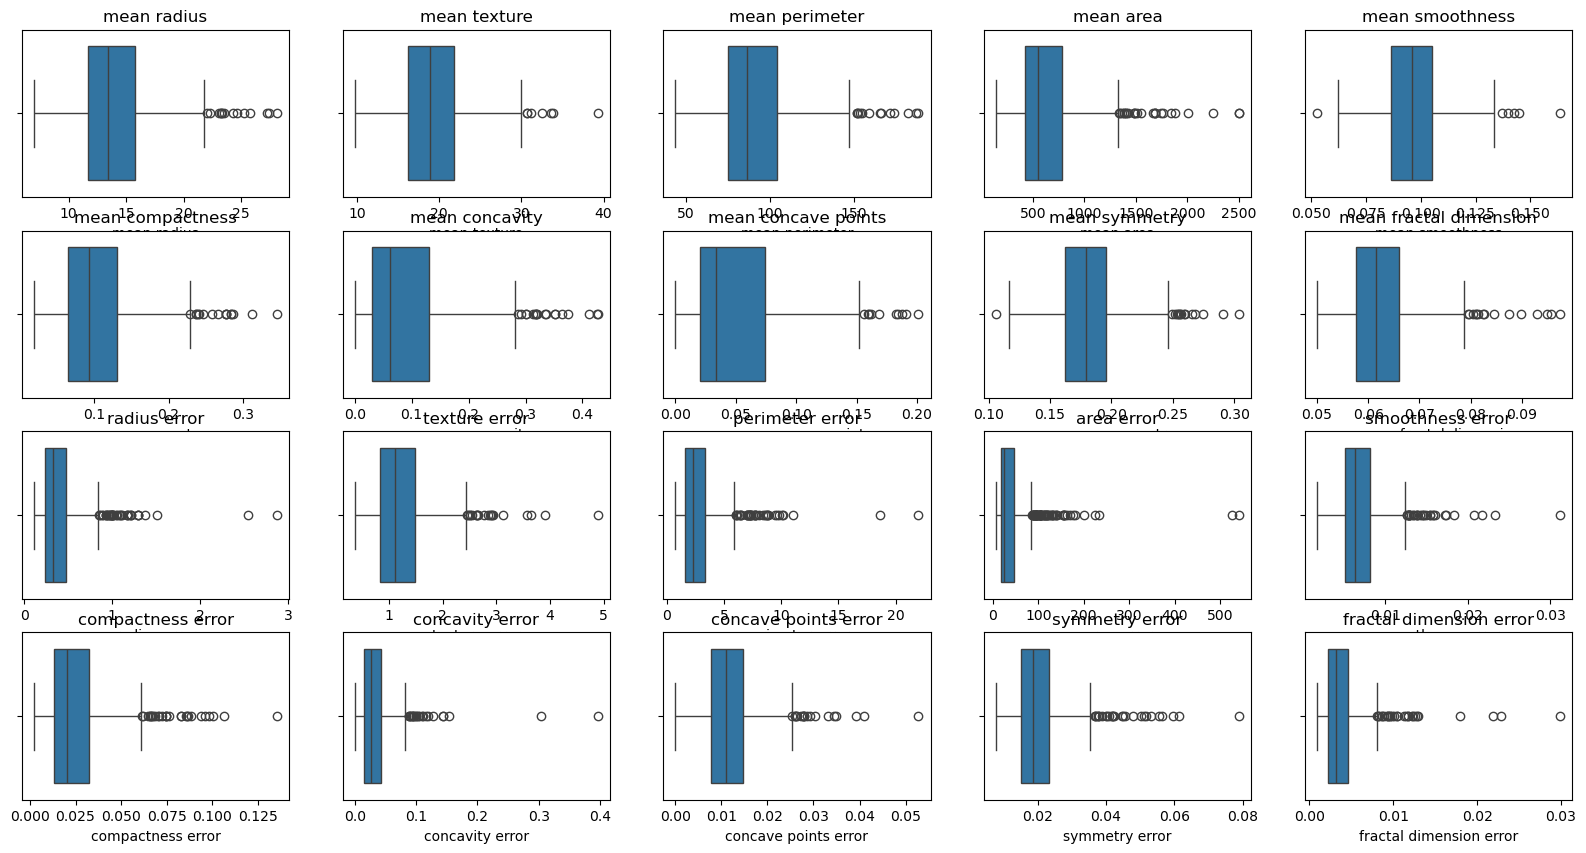

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


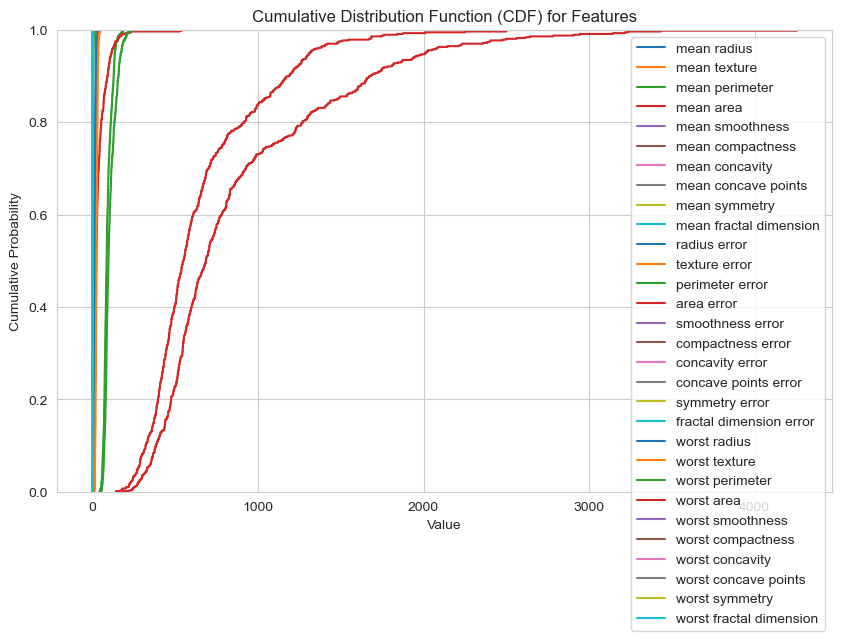

In [ ]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for col in df.columns[:-1]:
    sns.ecdfplot(df[col], label=col)
plt.title("Cumulative Distribution Function (CDF) for Features")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend(loc="best")
plt.show()


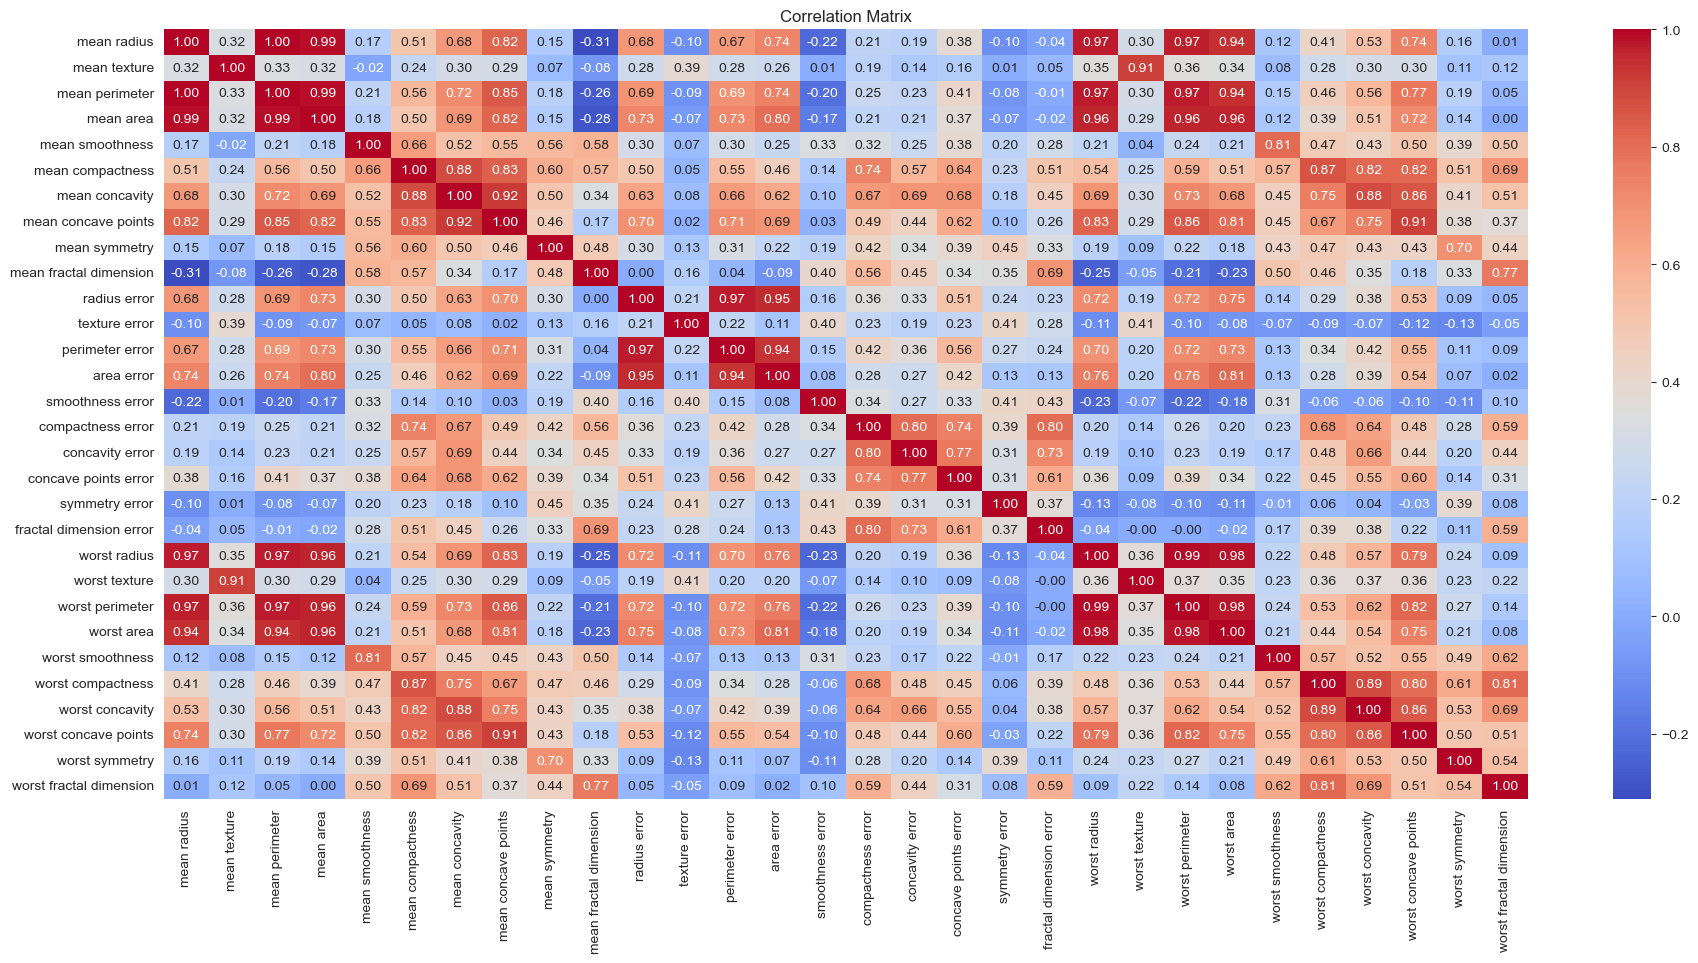

Covariance Matrix:
                          mean radius  mean texture  mean perimeter  \
mean radius                12.418920      4.907582       85.447142   
mean texture                4.907582     18.498909       34.439759   
mean perimeter             85.447142     34.439759      590.440480   
mean area                1224.483409    485.993787     8435.772345   
mean smoothness             0.008454     -0.001415        0.070836   
mean compactness            0.094197      0.053767        0.714714   
mean concavity              0.190128      0.103692        1.387234   
mean concave points         0.112475      0.048977        0.802360   
mean symmetry               0.014273      0.008419        0.121922   
mean fractal dimension     -0.007754     -0.002321       -0.044859   
radius error                0.663650      0.329037        4.661401   
texture error              -0.189189      0.916695       -1.162988   
perimeter error             4.803550      2.449449       34.053028   


In [8]:

correlation_matrix = df.iloc[:, :-1].corr()
plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
covariance_matrix = df.iloc[:, :-1].cov()
print("Covariance Matrix:\n", covariance_matrix)


In [ ]:
from scipy.stats import ttest_ind
malignant = df[df['target'] == 0]
benign = df[df['target'] == 1]
t_stat, p_value = ttest_ind(malignant['mean radius'], benign['mean radius'])
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")
if p_value < 0.05:
    print("There is a significant difference in the 'mean radius' between malignant and benign classes.")
else:
    print("There is no significant difference in the 'mean radius' between malignant and benign classes.")


T-statistic: 25.436, P-value: 0.00000
There is a significant difference in the 'mean radius' between malignant and benign classes.


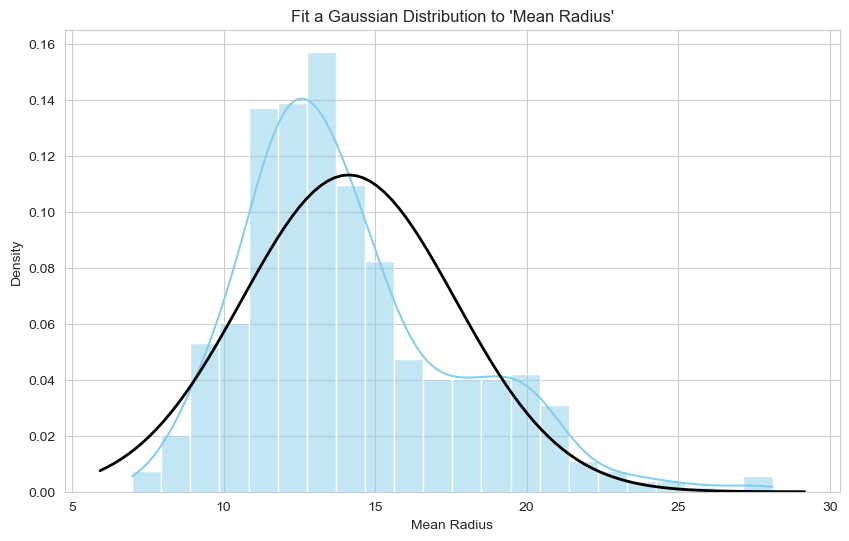

In [10]:
import numpy as np
from scipy.stats import norm
plt.figure(figsize=(10, 6))
sns.histplot(df['mean radius'], kde=True, stat="density", color='skyblue')
mu, std = norm.fit(df['mean radius'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit a Gaussian Distribution to 'Mean Radius'")
plt.xlabel("Mean Radius")
plt.ylabel("Density")
plt.show()


In [ ]:

df_normalized = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()
print(df_normalized.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           